In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pyiso
from pyiso import client_factory
from datetime import date
%matplotlib inline

In [4]:
caiso = client_factory('caiso')

In [18]:
load = pd.DataFrame(caiso.get_load(yesterday=True))
load = pd.DataFrame(caiso.get_load(yesterday=True))

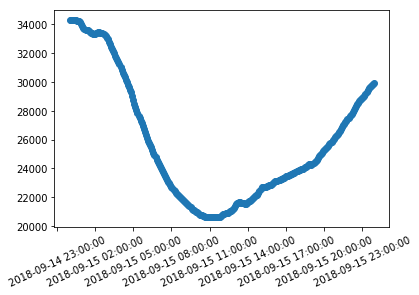

In [68]:
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.xticks(rotation=25)
ax=plt.gca()
ax.xaxis.set_major_formatter(xfmt)
ax.scatter(load['timestamp'].dt.to_pydatetime(),load['load_MW'])
plt.show()

In [64]:
load['timestamp'][0].to_pydatetime()

datetime.datetime(2018, 9, 15, 1, 50, tzinfo=<UTC>)

In [67]:
pd.to_datetime(load['timestamp'][0])

Timestamp('2018-09-15 01:50:00+0000', tz='UTC')